<font face="Arial" size="8" color="black">
    Dynamic Pricing Model – April 1, 2019
</font>

* Are your customers behaving with **lognormal** behavior?
* Are your customers behaving with **normal (gaussian)** behavior?

Read more about lognormal distributions here: https://en.wikipedia.org/wiki/Log-normal_distribution

**Set Plotting Params**

In [396]:
import matplotlib
dpi_value = 250
FIGSIZE = (12,8)
matplotlib.rcParams['figure.figsize'] = FIGSIZE

# Create Customer Distribution

According to `scipy.stats:`
<pre>
A log-normal distribution results if a random variable is the *product*
    of a large number of independent, identically-distributed variables in
    the same way that a normal distribution results if the variable is the
    *sum* of a large number of independent, identically-distributed
    variables.
    </pre>

In [1]:
from scipy.stats import lognorm, norm
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
import time

today = datetime.date.today().strftime('%m-%d-%Y') 
print('The day today is: %s' %today)

The day today is: 04-01-2019


In [63]:
# If you want to test for speed
#now = time.time()
np.random.seed(1)

# Mean Reserve Price (mrp)
mrp = 65

# How intense is the skew of your lognorm distribution?
volatility = 1

# How big do you want your population?
size = 100_000

# Get mu – the alterred mrp equivelant to sigma in the following equation:
# BLAH
mu = np.log(mrp) - (0.5*volatility**2)
audience = np.random.lognormal(mu,volatility, size)

# Max price – anyone willing to pay higher than this price is replaced with the max price
max_p = 4*mrp
# write as a lambda function then apply to the array
f_max = lambda x: x if x <= max_p else max_p
audience_f = [f_max(x) for x in audience]


print("""
The mean reserve price (mrp) is ${}

Before filter/replace:
    The mean price (willingness to pay) is ${}
    The median price (willingness to pay) is ${}

After filtering/replacing values above ${}
    The mean price (willingness to pay) is ${}
    The median price (willingness to pay) is ${}


""".format(mrp,
    round(np.mean(audience),2),
    round(np.median(audience),2),
    max_p,
    round(np.mean(audience_f),2),
    round(np.median(audience_f),2)
          ))


The mean reserve price (mrp) is $65

Before filter/replace:
    The mean price (willingness to pay) is $65.27
    The median price (willingness to pay) is $39.66

After filtering/replacing values above $260
    The mean price (willingness to pay) is $60.71
    The median price (willingness to pay) is $39.66





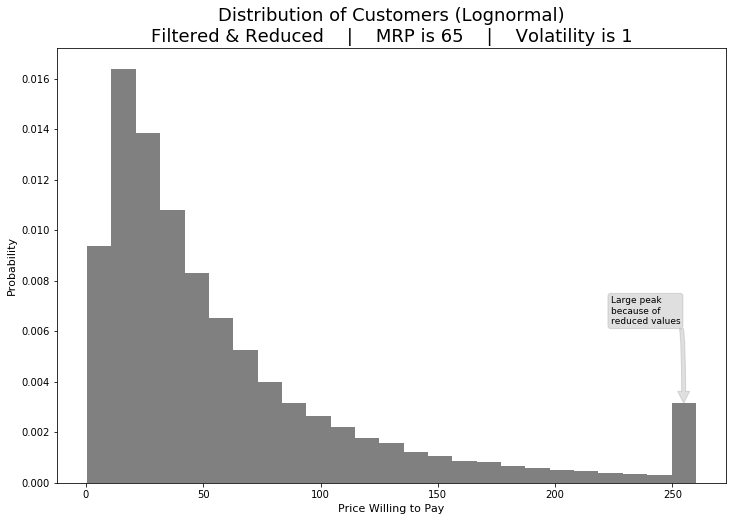

In [244]:
title_in = 'Distribution of Customers (Lognormal)\nFiltered & Reduced    |    MRP is {}    |    Volatility is {}'.format(mrp, volatility)
plt.title(title_in, size = 18)

values, bin_edges = np.histogram(audience_f, bins=25, density=True)
width_bins = bin_edges[1]-bin_edges[0]
plt.bar(bin_edges[:-1], values, width_bins, align ='edge', color='grey')

plt.xlabel('Price Willing to Pay', size = 11)
plt.ylabel('Probability', size = 11)
plt.annotate('Large peak\nbecause of\nreduced values',
             xy=(bin_edges[-1] - width_bins/2, values[-1]),
             xytext=(bin_edges[-4]- width_bins/2,values[-1]*2),
             bbox = dict(boxstyle = 'round',color = 'grey',alpha = 0.25),
             color = 'black',
             arrowprops=dict(color = 'grey', alpha=0.25, connectionstyle = 'angle3,angleA=0,angleB=-90'),size=9)

title_save = title_in.replace('\n',' ').replace('    |    ',' - ')
#plt.savefig(title_save+'.png')
plt.show()

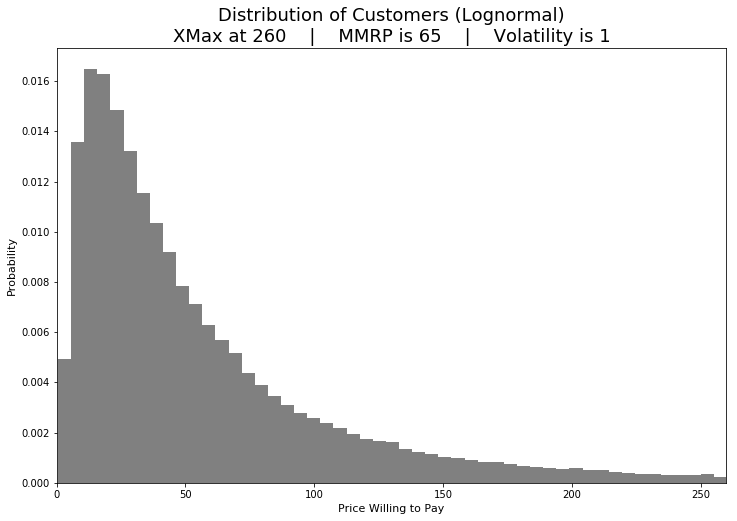

In [273]:
title_in = 'Distribution of Customers (Lognormal)\nXMax at {}    |    MMRP is {}    |    Volatility is {}'.format(max_p,mrp, volatility)
plt.title(title_in, size = 18)


values, bin_edges = np.histogram(audience, bins=500, density=True)
width_bins = bin_edges[1]-bin_edges[0]
plt.bar(bin_edges[:-1], values, width_bins, align ='edge', color='grey')

plt.xlabel('Price Willing to Pay', size = 11)
plt.axis(xmin=0, xmax = max_p)
plt.ylabel('Probability', size = 11)
# plt.annotate('Large peak\nbecause of\nreduced values',
#              xy=(bin_edges[-1] - width_bins/2, values[-1]),
#              xytext=(bin_edges[-4]- width_bins/2,values[-1]*2),
#              bbox = dict(boxstyle = 'round',color = 'grey',alpha = 0.25),
#              color = 'black',
#              arrowprops=dict(color = 'grey', alpha=0.25, connectionstyle = 'angle3,angleA=0,angleB=-90'),size=9)

title_save = title_in.replace('\n',' ').replace('    |    ',' - ')
#plt.savefig(title_save+'.png')
plt.show()

In [357]:
def get_cum_sum(values, inverse = True):
    """
    returns the cumultive sum
    """
    val_len = len(values)
    
    i=0
    # Iterate backwards
    cum_sum_vals = []
    if inverse:
        direction = -1
    else:
        direction = 1
    for value in values[::direction]:
        if len(cum_sum_vals)==0:
            cum_sum_vals.append(value)
        else:
            new_value = cum_sum_vals[i] + value
            cum_sum_vals.append(new_value)
            i+=1

    return cum_sum_vals

#get_cum_sum([5,11,12], False)

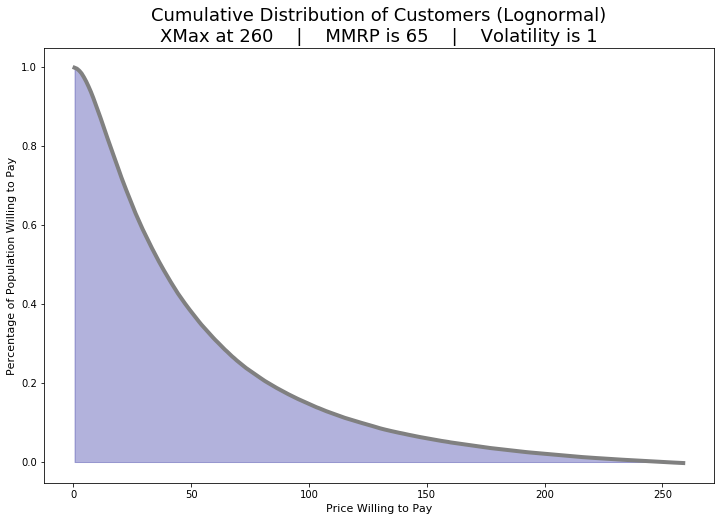

In [390]:
title_in = 'Cumulative Distribution of Customers (Lognormal)\nXMax at {}    |    MMRP is {}    |    Volatility is {}'.format(max_p,mrp, volatility)
plt.title(title_in, size = 18)
title_save = title_in.replace('\n',' ').replace('    |    ',' - ')

audience_use = [x for x in audience if x <= max_p]
values, bin_edges = np.histogram(audience_use, bins=max_p, density=True)
width_bins = bin_edges[1]-bin_edges[0]

cum_values = 1 - np.cumsum(values)

plt.plot(bin_edges[:-1], cum_values, c= 'grey', linewidth = 4)

plt.fill_between(bin_edges[:-1], cum_values, color='darkblue',alpha =0.3)

plt.xlabel('Price Willing to Pay', size = 11)
plt.ylabel('Percentage of Population Willing to Pay', size = 11)

plt.savefig(title_save+'.png')
plt.show()

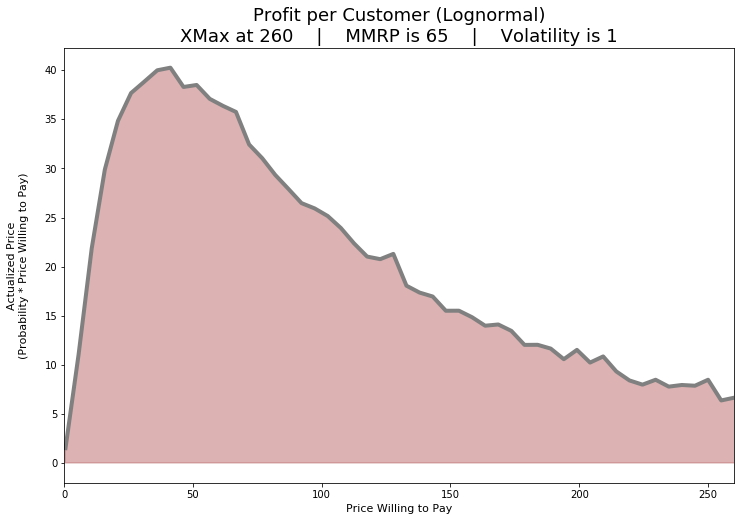

In [318]:
title_in = 'Profit per Customer (Lognormal)\nXMax at {}    |    MMRP is {}    |    Volatility is {}'.format(max_p,mrp, volatility)
plt.title(title_in, size = 18)

values, bin_edges = np.histogram(audience, bins=500, density=True)

new_values = values * (bin_edges[:-1]+ width_bins/2) * 100
plt.plot(bin_edges[:-1], new_values, color='grey', linewidth = 4)

plt.fill_between(bin_edges[:-1],new_values, color='darkred',alpha =0.3)

plt.axis(xmin=0, xmax = max_p)

plt.xlabel('Price Willing to Pay', size = 11)
plt.ylabel('Actualized Price\n(Probability * Price Willing to Pay)\n', size = 11)

title_save = title_in.replace('\n',' ').replace('    |    ',' - ')
#plt.savefig(title_save+'.png')
plt.show()

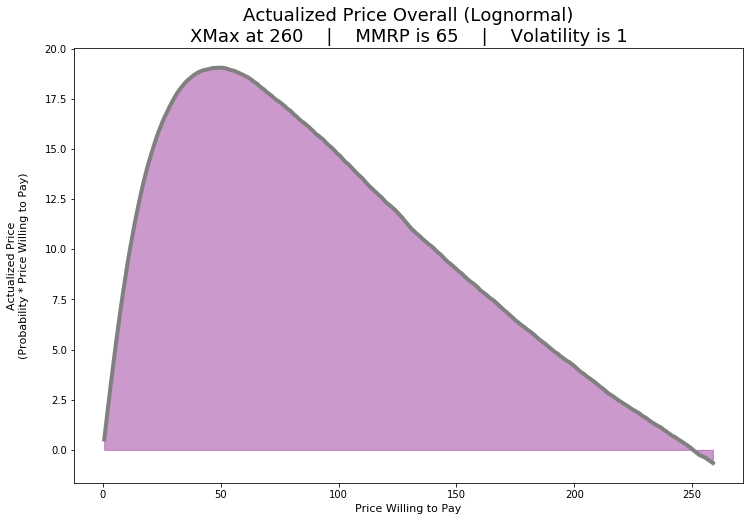

In [395]:
title_in = 'Actualized Price Overall (Lognormal)\nXMax at {}    |    MMRP is {}    |    Volatility is {}'.format(max_p,mrp, volatility)
plt.title(title_in, size = 18)

audience_use = [x for x in audience if x <= max_p]
values, bin_edges = np.histogram(audience_use, bins=max_p, density=True)
width_bins = bin_edges[1]-bin_edges[0]

x_vals = [x for x in bin_edges[:-1]]

cum_values = 1 - np.cumsum(values)
price_act = cum_values*x_vals

plt.plot(x_vals, price_act, c= 'grey', linewidth = 4)

plt.fill_between(x_vals, price_act, color='purple',alpha =0.4)


#plt.axis(xmin=0, xmax = max_p)

plt.xlabel('Price Willing to Pay', size = 11)
plt.ylabel('Actualized Price\n(Probability * Price Willing to Pay)\n', size = 11)

title_save = title_in.replace('\n',' ').replace('    |    ',' - ')
#plt.savefig(title_save+'.png')
plt.show()